In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Real_Combine.csv')
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [ ]:
df = df.dropna()


In [ ]:
X = df.iloc[:,:-1]  ##Independent Features,


Y = df.iloc[:,-1] ##Dependent Features,


In [ ]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)p

SyntaxError: ignored

In [ ]:
print(model.feature_importances_)


NameError: ignored

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<ipython-input-7-7657aee24f7e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

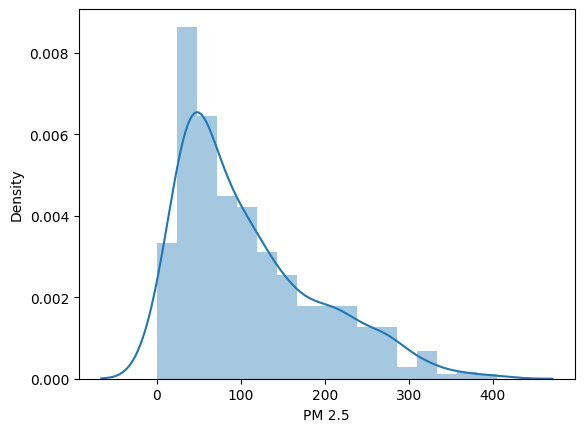

In [ ]:
sns.distplot(Y)


In [ ]:
X

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
X_test

,T,TM,Tm,SLP,H,VV,V,VM
197,14.3,20.3,9.9,1019.1,88.0,0.6,8.9,14.8
188,11.9,20.7,4.4,1017.9,78.0,0.8,1.9,7.6
14,14.9,21.9,7.1,1018.3,73.0,0.6,2.0,7.6
31,19.0,26.8,11.7,1016.3,58.0,2.6,16.7,29.4
391,19.3,28.6,10.6,1009.5,65.0,2.6,4.3,14.8
...,...,...,...,...,...,...,...,...
155,23.8,30.5,18.4,1013.5,71.0,1.6,1.3,3.5
392,18.9,28.6,11.2,1012.8,73.0,0.8,1.5,7.6
572,17.2,26.0,11.5,1014.7,65.0,2.3,5.7,14.8
307,34.1,39.4,27.5,1001.1,53.0,2.9,8.0,20.6


In [ ]:
import xgboost as xgb


In [ ]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.9997842299242427


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))


Coefficient of determination R^2 <-- on train set: 0.6104024046485017


In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [ ]:
score.mean()


0.4545628713565547

In [ ]:
pd.DataFrame({'hi': [1,23, 4]})

,hi
0,1
1,23
2,4


In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
prediction=regressor.predict(X_test)


<ipython-input-38-0e5e279aab22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

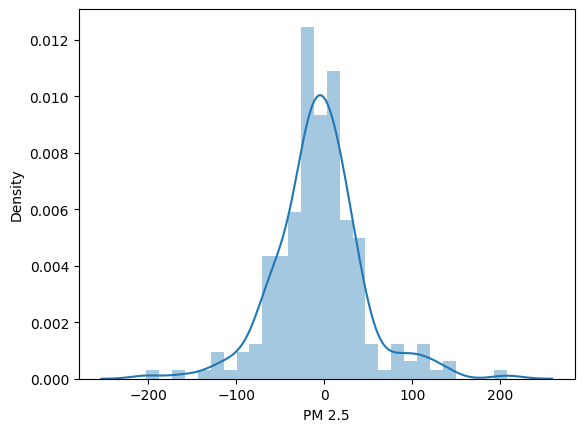

In [ ]:
sns.distplot(y_test-prediction)


In [ ]:
xgb.XGBRegressor()


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
regressor=xgb.XGBRegressor()


In [ ]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
xg_random.fit(X_train,y_train)


In [ ]:
xg_random.best_params_


In [ ]:
xg_random.best_score_


In [ ]:
predictions=xg_random.predict(X_test)


In [ ]:
sns.distplot(y_test-predictions)


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))